<a href="https://colab.research.google.com/github/skaty5678/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_SANJEEV_KUMAR_THAKUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

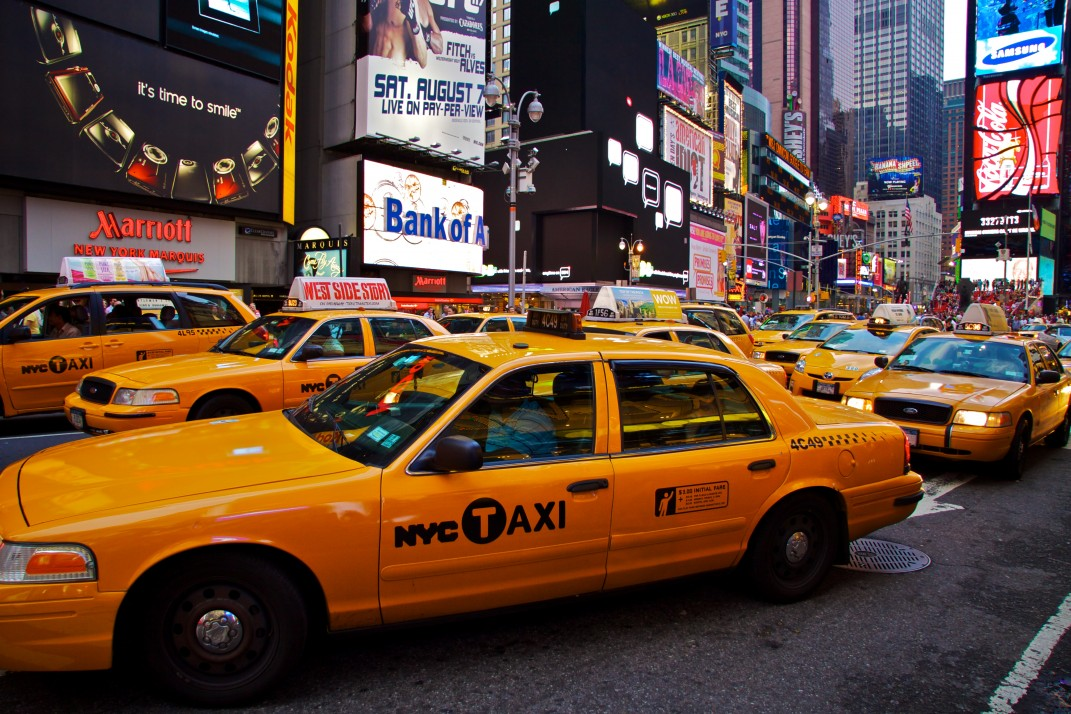

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### **id** - a unique identifier for each trip
* #### **vendor_id** - a code indicating the provider associated with the trip record
* #### **pickup_datetime** - date and time when the meter was engaged
* #### **dropoff_datetime** - date and time when the meter was disengaged
* #### **passenger_count** - the number of passengers in the vehicle (driver entered value)
* #### **pickup_longitude** - the longitude where the meter was engaged
* #### **pickup_latitude** - the latitude where the meter was engaged
* #### **dropoff_longitude** - the longitude where the meter was disengaged
* #### **dropoff_latitude** - the latitude where the meter was disengaged
* #### **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### **trip_duration** - duration of the trip in seconds

#**Why is it important ?**

##***Predicting the duration of a taxi trip is very important since a user would always like to know precisely how much time it would require of him to travel from one place to another. Given the rising popularity of app-based taxi usage through common vendors like Ola and Uber, competitive pricing has to be offered to ensure users choose them. Prediction of duration and price of trips can help users to plan their trips properly, thus keeping potential margins for traffic congestions.***

#<b>Setting the stage for our Dataset</b>


In [ ]:
#Bringing in all the important libraries required for a smooth data exploration.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#the raw data

raw_df = pd.read_csv('/content/drive/MyDrive/Copy of NYC Taxi Data.csv')

In [ ]:
raw_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
raw_df.shape

(1458644, 11)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
raw_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


##**-->**9 passengers in a single cab seems to be an error and if not then definitely an exception.

##**-->**Trip duration of 3526282 seconds i.e. almost 40 days. These long trips NYC taxis don't provide for sure. So this must be an error and needs to be fixed before providing it to the model.

In [ ]:
#dealing with the null values
def missing_values(df):

  #total of missing values for each column
  total_missing_value = df.isna().sum()

  #percentage of missing values 
  percent_missing_value = total_missing_value*100/len(df)

  #making a table of the above results
  table = pd.concat([total_missing_value,percent_missing_value],axis = 1)

  #renaming the columns
  table.rename(columns = {0:'missing values',1:'percent of missing values'},inplace = True)

  #sorting the table in decreasing order by percentage of missing values
  missing_values_table = table.sort_values('percent of missing values',ascending = False).round(1)

  return missing_values_table

In [ ]:
missing_values(raw_df)

,missing values,percent of missing values
id,0,0.0
vendor_id,0,0.0
pickup_datetime,0,0.0
dropoff_datetime,0,0.0
passenger_count,0,0.0
pickup_longitude,0,0.0
pickup_latitude,0,0.0
dropoff_longitude,0,0.0
dropoff_latitude,0,0.0
store_and_fwd_flag,0,0.0


##The dataset has no null values. But it does have some values which are quite absurd so we will try to fix them or get rid of them whichever seems appropriate.

In [ ]:
#checking for numeric features
numeric_features = raw_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [ ]:
#checking for categorical features
categorical_features = raw_df.describe(include=['object','category']).columns
categorical_features

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

#<b>Data preparation for Exploratory Data Analysis and Visualizations.</b>

##Before we feed the data to our models. First we will try to interpret what the data is trying to convey by extracting necessary information from it using EDA and graphical visualisations.

In [ ]:
df = raw_df.copy()

##Firstly, we will change the datatype of pickup time and dropoff time from object to datetime so as to extract useful information from them.

In [ ]:
df[["pickup_datetime", "dropoff_datetime"]] = df[["pickup_datetime", "dropoff_datetime"]].apply(pd.to_datetime)


##We have coordinates in the form of pickup and dropoff longitudes and latitudes. But we can’t really gather any insights or draw conclusions from that. So, the most obvious feature that we can extract from this is **distance**. And for that we will use Haversine to extract distance from given coordinates in **km**.

In [ ]:
#installing haversine
%%capture
pip install haversine

In [ ]:
#importing haversine library
from haversine import haversine,Unit

In [ ]:
#defining haversine distance
def haversine_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    dropoff = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, dropoff)

In [ ]:
df['distance'] = df.apply(lambda x: haversine_distance(x), axis = 1)


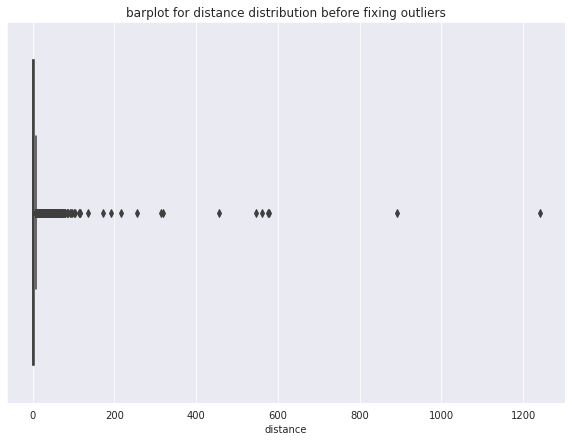

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['distance'], orient='horizontal')
plt.title('barplot for distance distribution before fixing outliers')
plt.show()

In [ ]:
df[df['distance'] == 0].value_counts().sum()

5897

##We can see that close to **6000** trips have travelled **zero distance** which is a bit absurd but some possible reasons for that could be that 
##1.The passenger or the driver cancelled the trip just after the acceptance of the trip. 
##2.Technical issue occured due to which dropoff location couldn't be recorded properly so that is why it is the same as the pickup location.
##3.There might be an issue with GPS tracker.

##Let's get rid of the records where distance was zero as they are not going to add any value to our model.

In [ ]:
#removing the distances with zero as values
df = df[~(df.distance == 0)]

##We will create a new feature **SPEED** in **km/hour** from distance and trip duration for analysis.

In [ ]:
#creating new variable speed from trip duration and distance
df['speed'] = (df.distance/(df.trip_duration/3600))


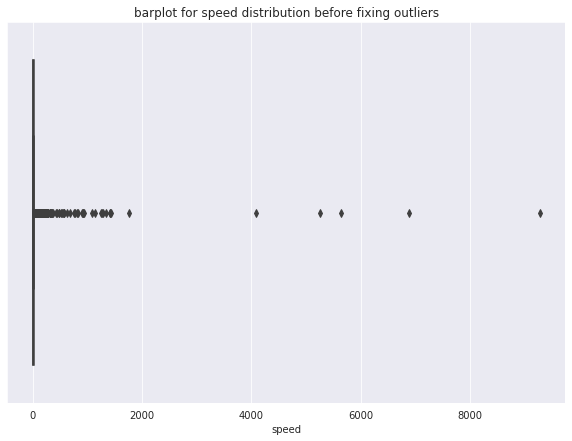

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['speed'], orient='horizontal')
plt.title('barplot for speed distribution before fixing outliers')

plt.show()

## As far as knowledge goes NYC cab providers don't give Bugatti Chiron or  McLaren F1 as a cab so we'll get rid of all the records where the speed exceeded the 110 kmph which is just above the maximum speed allowed on state highways in NYC:).

In [ ]:
#keeping the data where speed is less than 110 kmph only
df = df[~(df.speed < 1)]
df = df[~(df.speed > 110)]

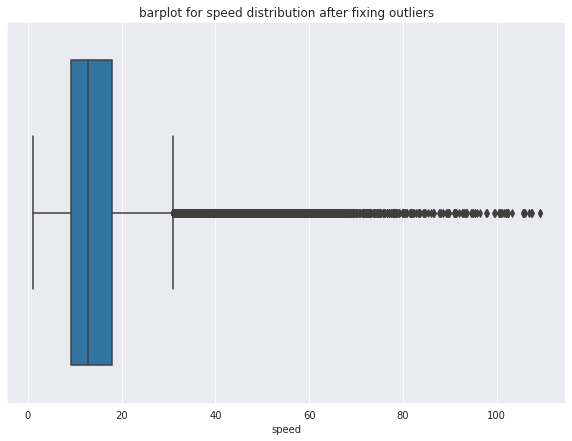

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['speed'], orient='horizontal')
plt.title('barplot for speed distribution after fixing outliers')
plt.show()

##We will remove the trips with passenger counts with more than 6 since they are very few in number and seem to be quite odd to fit more than 6 people in a single cab and for passenger with zero count we will replace them with floor value of the mean of the passenger count because maybe the driver forgot to pin the number of passengers.

In [ ]:
#mean of passenger count
df.passenger_count.mean()

1.6642502534154873

In [ ]:
#removing the data where passenger count is more than 6
df = df[df.passenger_count <=6]
df['passenger_count'] = df.passenger_count.map(lambda x: 1 if x == 0 else x)


In [ ]:
df.passenger_count.value_counts()

1    1024149
2     208433
5      77385
3      59370
6      47791
4      28127
Name: passenger_count, dtype: int64

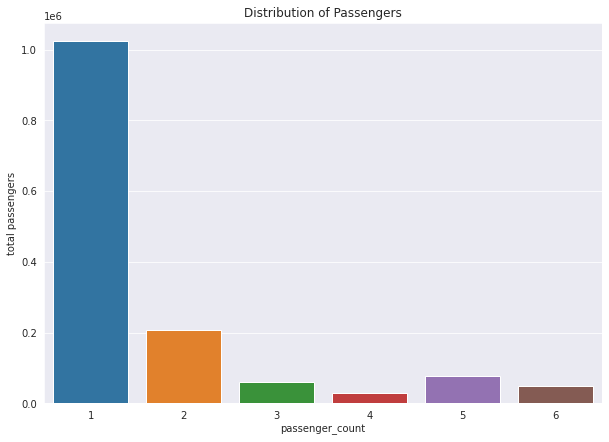

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(df['passenger_count'])
plt.title('Distribution of Passengers')
plt.ylabel("total passengers")
plt.show()

##Well it's quite visible that people don't like company while travelling and to be left alone atleast while travelling. Very rarely it can be seen people travelling in a group.


In [ ]:
#Extracting information from pickup_datetime about the month, week and hour of pickup

df['month'] = df.pickup_datetime.dt.month
df['pickup_day']=df.pickup_datetime.dt.day_name()
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [ ]:
#Extracting information from dropoff_datetime about the month, week and hour of dropoff

df['dropff_day']=df.dropoff_datetime.dt.day_name()
df['dropff_hour'] = df.dropoff_datetime.dt.hour

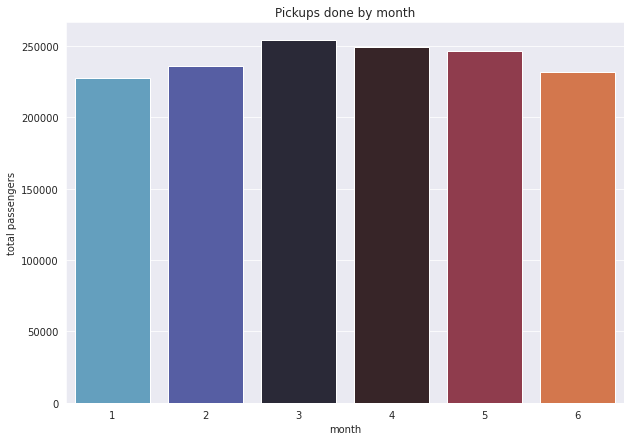

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='month',data=df,palette="icefire")
plt.title('Pickups done by month')
plt.ylabel("total passengers")
plt.show()

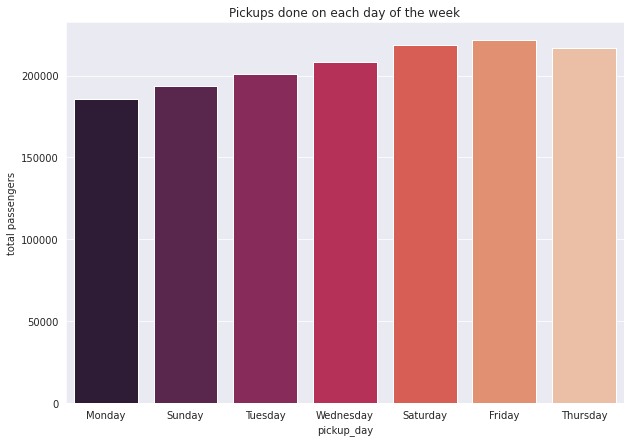

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='pickup_day',data=df,palette='rocket')
plt.title('Pickups done on each day of the week')
plt.ylabel("total passengers")
plt.show()

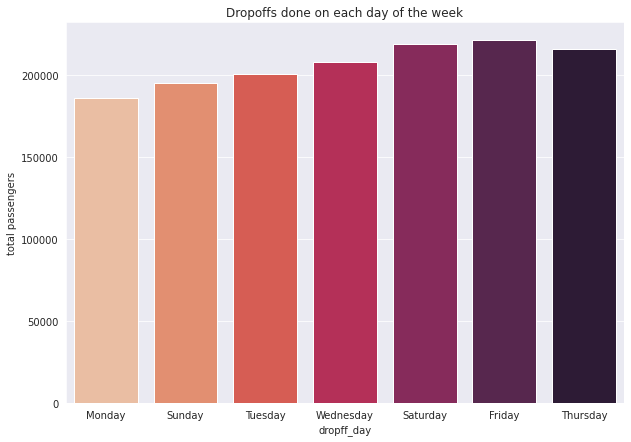

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='dropff_day',data=df,palette='rocket_r')
plt.title('Dropoffs done on each day of the week')
plt.ylabel("total passengers")
plt.show()

##Most number of pickups have happened on **Friday** while Monday has witnessed the least number of pickups. And same is the case when it comes for dropoffs.

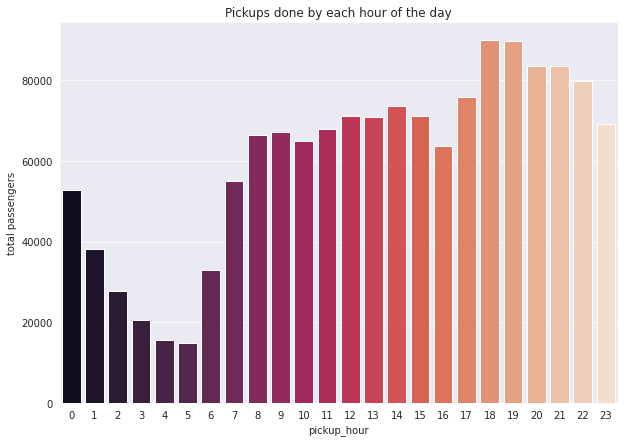

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='pickup_hour',data=df,palette="rocket")
plt.title('Pickups done by each hour of the day')
plt.ylabel("total passengers")
plt.show()

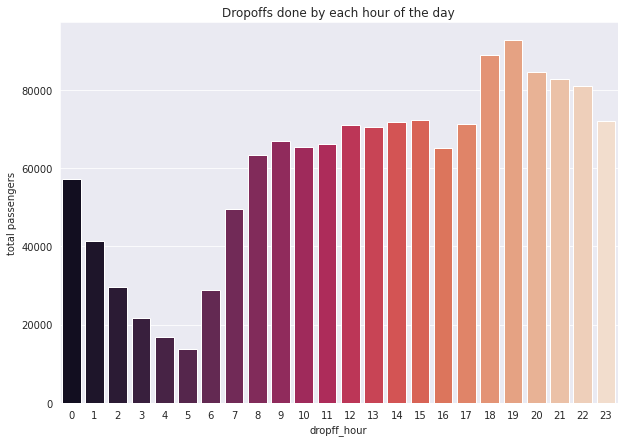

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='dropff_hour',data=df,palette="rocket")
plt.title('Dropoffs done by each hour of the day')
plt.ylabel("total passengers")
plt.show()

##We can observe that most pickups and drops happen around the time between **5 PM to 9 PM** . While the least number of drops and pickups occur between 2 AM to 7 AM. A possible reason for this could be that most number of office going people travel via metro or whatever public transport service is there in the morning for travelling but when heading back from office people are actually very tired to travel in a public transport so they prefer cabs.


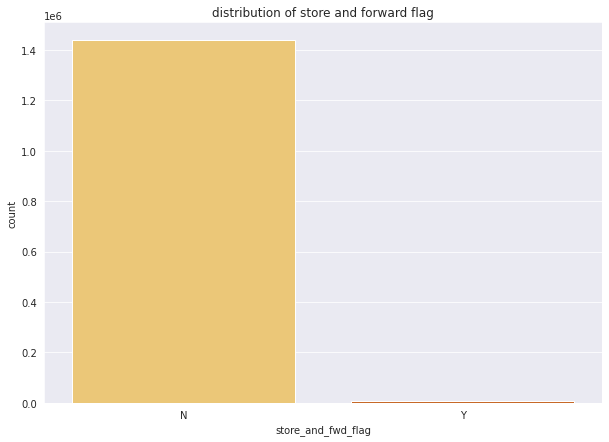

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='store_and_fwd_flag',data=df,palette="YlOrBr")
plt.title('distribution of store and forward flag')
plt.show()

##We can see that there are a minimal number of trips that were stored before forwarding.



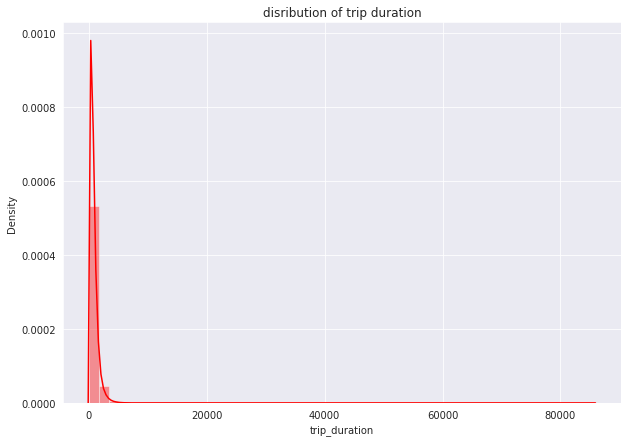

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['trip_duration'],color="r")
plt.title('disribution of trip duration')
plt.show()


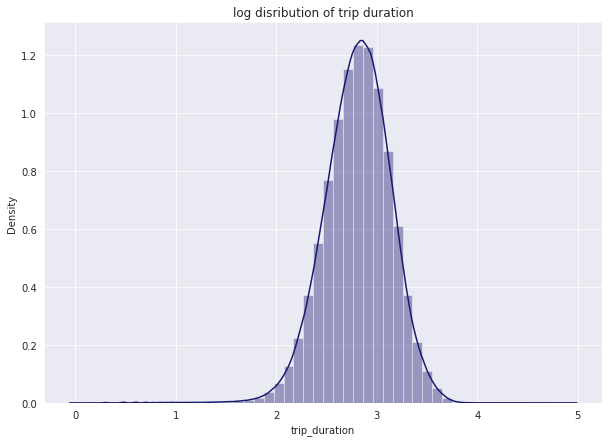

In [ ]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(np.log10(df['trip_duration']),color="midnightblue")
plt.title('log disribution of trip duration')
plt.show()

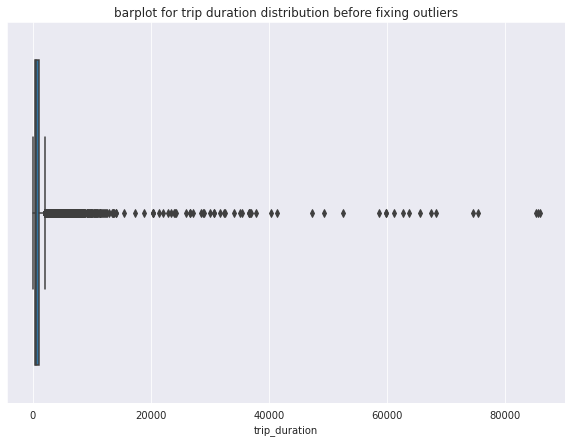

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('barplot for trip duration distribution before fixing outliers')
plt.show()

##This histogram and boxplot show that there is extreme right skewness and hence there are some outliers.

In [ ]:
#keeping the data where trip duration is less and more than equal to the particular values given below
df = df[df.trip_duration <= 86392]

In [ ]:
df = df[~(df.trip_duration <= 60)]

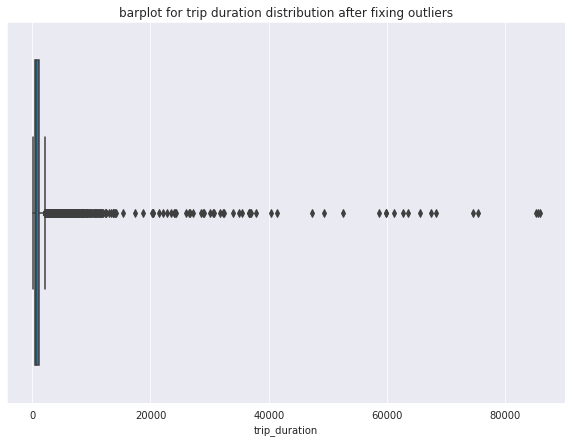

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('barplot for trip duration distribution after fixing outliers')
plt.show()

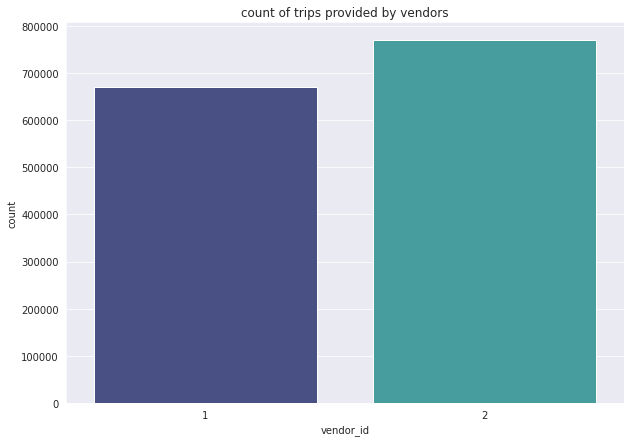

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='vendor_id',data=df,palette="mako")
plt.title('count of trips provided by vendors')
plt.show()

##Not that huge a difference can be observed in case of vendors.

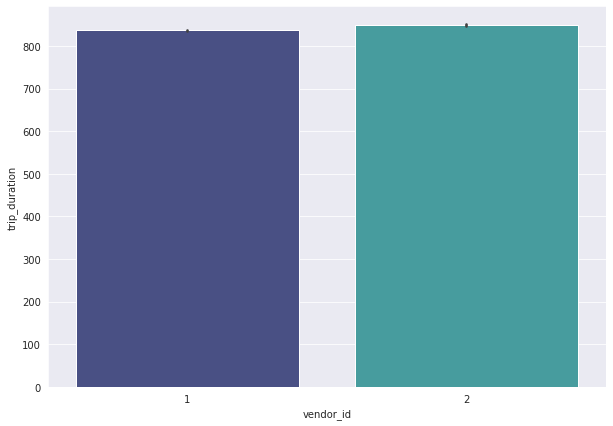

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean,palette="mako")
plt.show()

##Vendor 2 has taken longer trips in comparison to vendor 1 but there is not that big of a difference.

<Figure size 720x504 with 0 Axes>

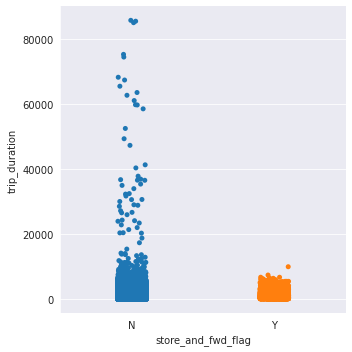

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df)
plt.show()

##Trips duration were longer for those whose flag was not stored before the trip started.

<Figure size 720x504 with 0 Axes>

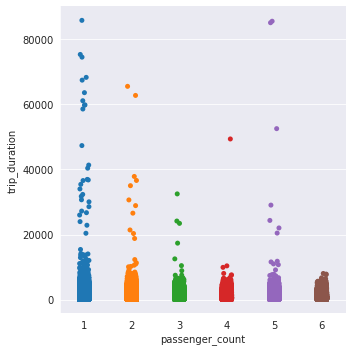

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.catplot(x='passenger_count',y='trip_duration',data=df)
plt.show()

##A very significant visible difference could not be established except the fact that trips of all the durations have been done for passenger count 1.

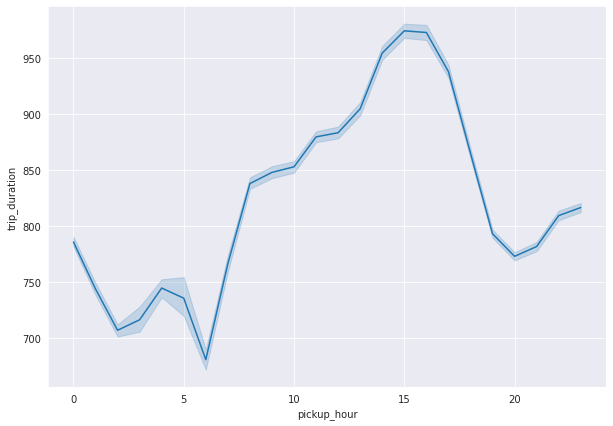

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.lineplot(x='pickup_hour',y='trip_duration',data=df,markers=True)
plt.show()

##Pickup hours between 14 to 18 hours has experienced the highest trip durations maybe because of the traffic.

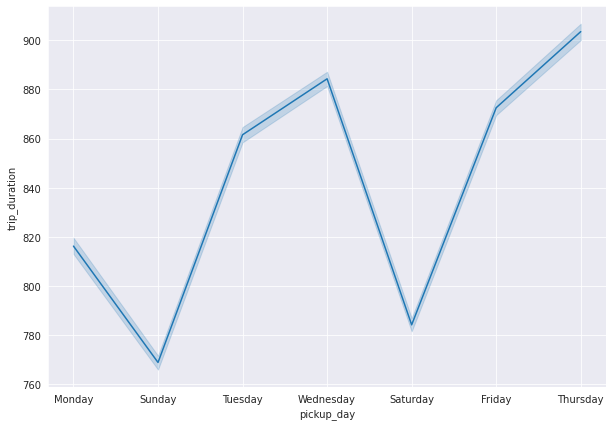

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.lineplot(x='pickup_day',y='trip_duration',data=df,markers=True)
plt.show()

##Cabs for long trips were availed on Fridays and Thursdays. a very concrete reason for this could not be established but one of the possible reason could be that the weekend starts on friday so people prefer to go places rather than go home after work.

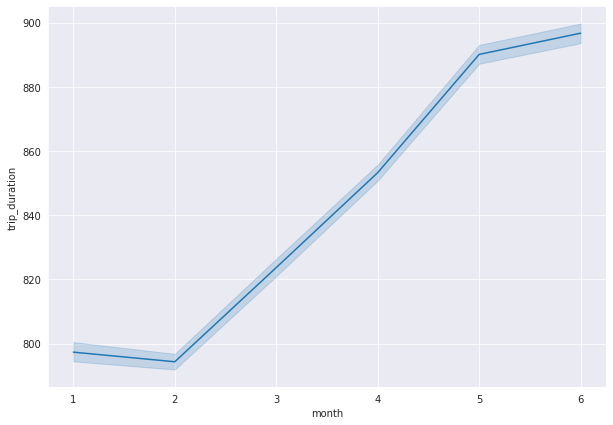

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.lineplot(x='month',y='trip_duration',data=df,markers=True)
plt.show()

##A possible reason for this behaviour could be that January, February have an average temperature of 4-5 degree celcius leading to low visibility because of smog and possibly people prefer not to take cabs as it is more prone to accidents but from March onwards the weather becomes more pleasant and people prefer cabs. 

<Figure size 720x504 with 0 Axes>

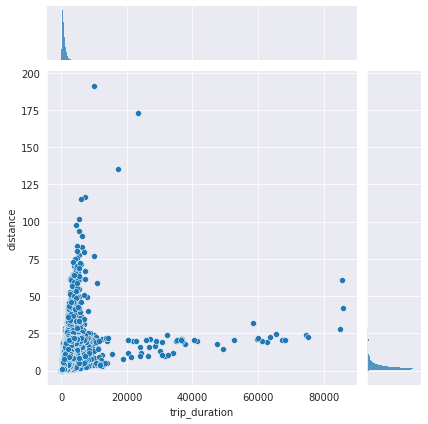

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.jointplot(data=df, x="trip_duration", y="distance")
plt.show()

##We can see some interesting observations from this graph - cluster can be seen for the distance from 0 to 25 kms and for the same the trip duration being in the range from 0 to 3-4 hrs.

##2 or 3 trips are there with duration of almost whole day and still the distance tarvelled is close to 50kms and less than that. A possible and more logical reason could be that they might have booked the cab for the whole day for long trips most probably.

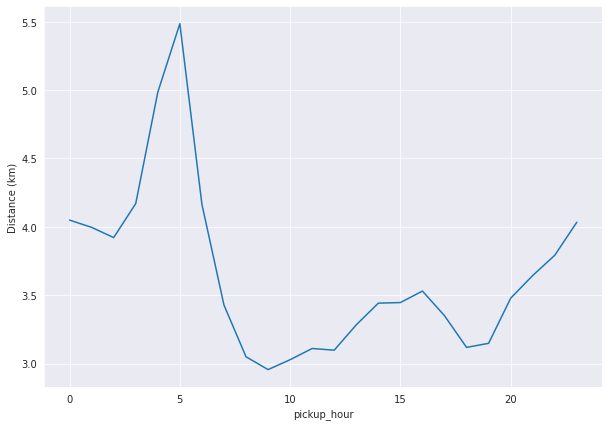

In [ ]:
groupby_1 = df.groupby(['pickup_hour']).distance.mean()
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.lineplot(x = groupby_1.index,y=groupby_1.values,markers=True)
plt.ylabel('Distance (km)')
plt.show()

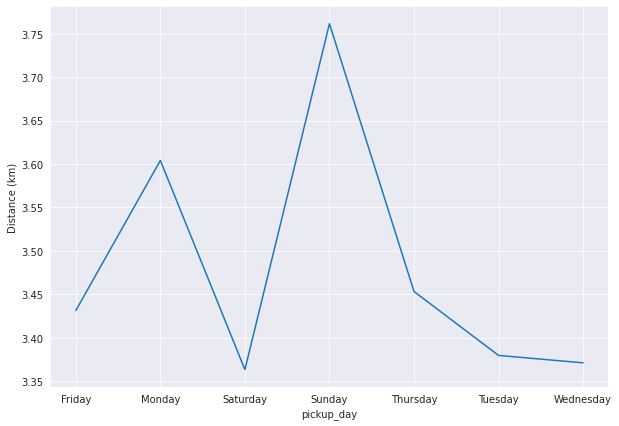

In [ ]:
groupby_2 = df.groupby(['pickup_day']).distance.mean()
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.lineplot(x = groupby_2.index,y=groupby_2.values,markers=True)
plt.ylabel('Distance (km)')
plt.show()

##One of the reasons for long distance trips on Sunday could be that people prefer to book cabs for longer weekend trips.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439744 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1439744 non-null  object        
 1   vendor_id           1439744 non-null  int64         
 2   pickup_datetime     1439744 non-null  datetime64[ns]
 3   dropoff_datetime    1439744 non-null  datetime64[ns]
 4   passenger_count     1439744 non-null  int64         
 5   pickup_longitude    1439744 non-null  float64       
 6   pickup_latitude     1439744 non-null  float64       
 7   dropoff_longitude   1439744 non-null  float64       
 8   dropoff_latitude    1439744 non-null  float64       
 9   store_and_fwd_flag  1439744 non-null  object        
 10  trip_duration       1439744 non-null  int64         
 11  distance            1439744 non-null  float64       
 12  speed               1439744 non-null  float64       
 13  month       

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,month,pickup_hour,dropff_hour
count,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06
mean,1.534412e+00,1.664950e+00,-7.397362e+01,4.075099e+01,-7.397353e+01,4.075189e+01,8.428669e+02,3.474868e+00,1.448372e+01,3.516643e+00,1.361405e+01,1.360748e+01
std,4.988146e-01,1.314139e+00,3.777181e-02,2.787622e-02,3.567781e-02,3.221956e-02,7.094623e+02,3.959168e+00,7.628685e+00,1.680869e+00,6.396653e+00,6.480527e+00
min,1.000000e+00,1.000000e+00,-7.545592e+01,3.980393e+01,-7.613572e+01,4.024363e+01,6.100000e+01,1.863055e-02,1.000492e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073742e+01,-7.399133e+01,4.073595e+01,4.010000e+02,1.256944e+00,9.229763e+00,2.000000e+00,9.000000e+00,9.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398178e+01,4.075414e+01,-7.397978e+01,4.075456e+01,6.650000e+02,2.118666e+00,1.285943e+01,4.000000e+00,1.400000e+01,1.400000e+01
75%,2.000000e+00,2.000000e+00,-7.396750e+01,4.076836e+01,-7.396316e+01,4.076982e+01,1.076000e+03,3.911277e+00,1.788777e+01,5.000000e+00,1.900000e+01,1.900000e+01
max,2.000000e+00,6.000000e+00,-7.323800e+01,4.169680e+01,-7.271140e+01,4.169335e+01,8.582800e+04,1.914031e+02,1.091177e+02,6.000000e+00,2.300000e+01,2.300000e+01


#Given that we need to predict the trip duration from the features provided we will run regression model.
#We will run 3 models on the given dataset:


##1.  **Linear Regression.**
##2.  **Random Forest.**
##3.  **XGBoost.**





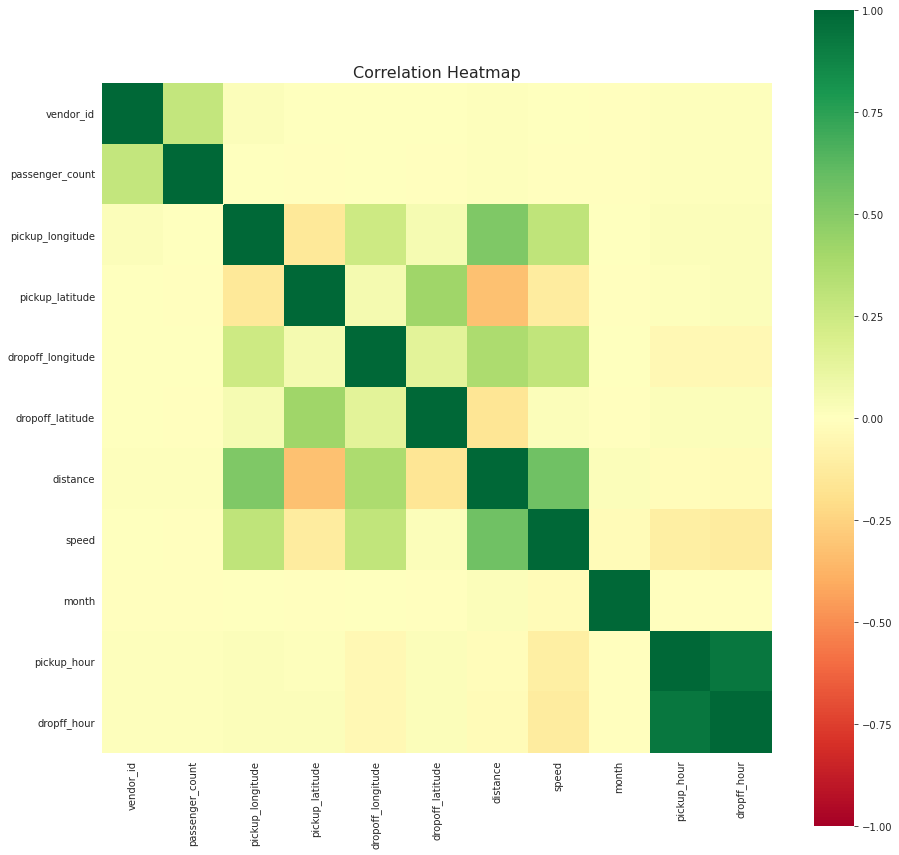

In [ ]:
#correlation heatmap
df_corr = df.drop(labels='trip_duration',axis=1)
correlation = df_corr.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#removing the categorical and target column before checking VIF
df_vif = df_corr.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day','dropff_day',
       'dropff_hour','speed'])

In [ ]:
calc_vif(df_vif)

,variables,VIF
0,vendor_id,6.911603
1,passenger_count,2.819662
2,distance,1.708531
3,month,4.202105
4,pickup_hour,4.302427


##Independent variables don't show that much of a multicollinearity.

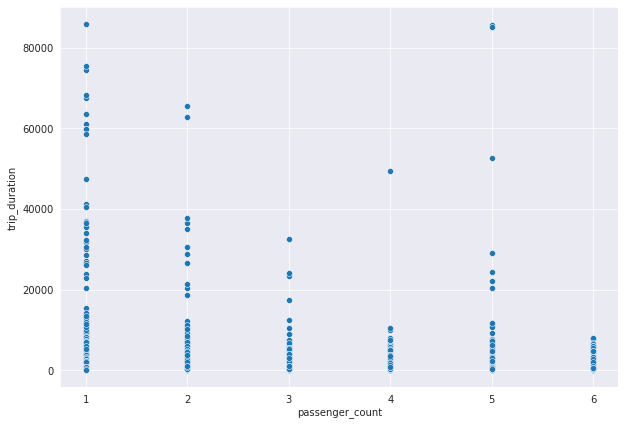

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="passenger_count", y="trip_duration")
plt.show()

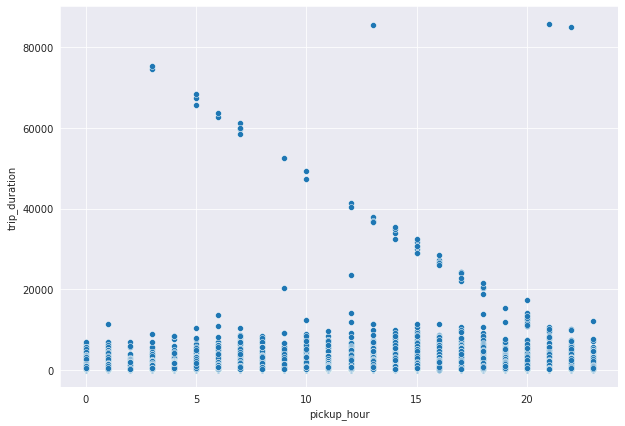

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="pickup_hour", y="trip_duration")
plt.show()

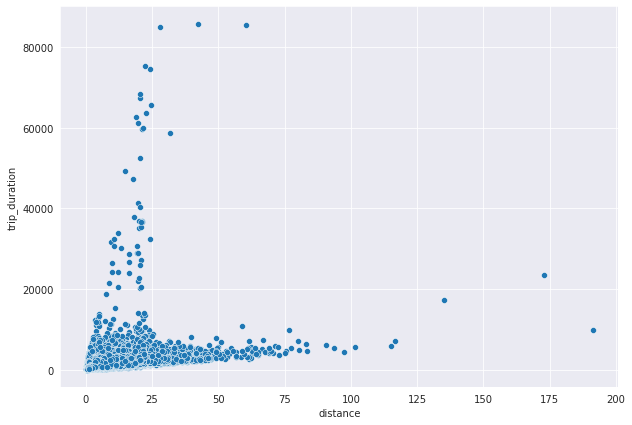

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="distance", y="trip_duration")
plt.show()

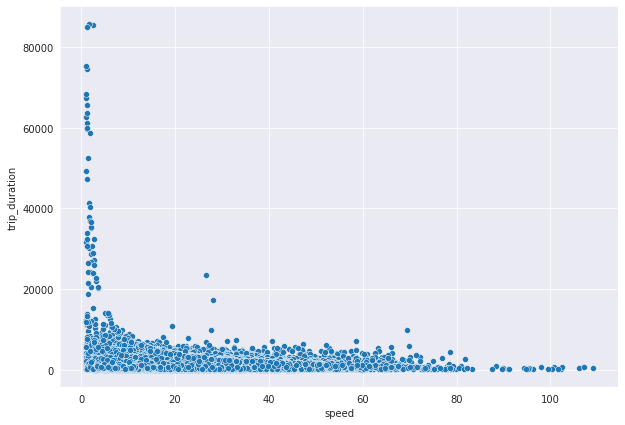

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="speed", y="trip_duration")
plt.show()

#***LINEAR REGRESSON***

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
%%capture
pip install yellowbrick


In [ ]:
#importing the libraries required for linear regression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [ ]:
#creating a copy of the df for linear regression
lr_df = df.copy()

In [ ]:
#week number of the year
lr_df['pickup_week'] = lr_df.pickup_datetime.dt.week

#week day number starts with monday = 0
lr_df['pickup_day'] = lr_df.pickup_datetime.dt.weekday

#minute of the hour
lr_df['minute'] = lr_df.pickup_datetime.dt.minute

#minute of the day
lr_df['pickup_minute'] = lr_df['pickup_hour'] * 60 + lr_df['minute']

lr_df.drop(columns=['minute'],inplace=True)


In [ ]:
lr_df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,month,pickup_day,pickup_hour,dropff_day,dropff_hour,pickup_week,pickup_minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,11.856445,3,0,17,Monday,17,11,1044
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,9.803672,6,6,0,Sunday,0,23,43


In [ ]:
#dummify the categorical variables 
lr_df = pd.get_dummies(lr_df,columns =['vendor_id', 'passenger_count', 'store_and_fwd_flag','month','pickup_day', 'pickup_hour','pickup_week'],
                        prefix=["vendor", "passenger","flag","month","day","hour","week"])

In [ ]:
#get rid of the columns that we don't need
#to avoid the dummy trap we will drop one column for every dummified categorical column
lr_df.drop(columns=['id','pickup_datetime', 'dropoff_datetime','speed','dropff_day','dropff_hour',
                    'vendor_1','passenger_1', 'flag_N','month_1','day_0','hour_0','week_1'],inplace=True)

In [ ]:
print(f'The shape of our dataset is:{lr_df.shape}')

The shape of our dataset is:(1439744, 74)


In [ ]:
lr_df.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'distance', 'pickup_minute',
       'vendor_2', 'passenger_2', 'passenger_3', 'passenger_4', 'passenger_5',
       'passenger_6', 'flag_Y', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10',
       'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16',
       'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
       'week_23', 'week_24', 'week_25', 'week_26', 'week_53'],
      dtype='object')

In [ ]:
#list of features to be used for training and testing 
features_lr = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'distance', 'pickup_minute',
       'vendor_2', 'passenger_2', 'passenger_3', 'passenger_4', 'passenger_5',
       'passenger_6', 'flag_Y', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10',
       'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16',
       'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
       'week_23', 'week_24', 'week_25', 'week_26', 'week_53']

In [ ]:
#creating an array of independent variable for faster run of our model
X_lr = np.array(lr_df[features_lr])

In [ ]:
# using minmacscalar to build the scaler model to help tackle the outlier effect 
scaler = MinMaxScaler()

# fit 
scaler.fit(X_lr)

# transform 
X_lr = scaler.transform(X_lr)

In [ ]:
#array of dependent variable
y_lr = np.array(np.log(lr_df['trip_duration']))

In [ ]:
#train test split of the model in 80:20 ratio
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split( X_lr,y_lr , test_size = 0.2, random_state = 123) 
print(X_lr_train.shape)
print(X_lr_test.shape)

(1151795, 73)
(287949, 73)


In [ ]:
#fitting the model on the train split
regressor = LinearRegression().fit(X_lr_train, y_lr_train)

In [ ]:
#predicting on the test split
y_lr_pred = regressor.predict(X_lr_test)


#root mean squared error 
rmse_lr = np.round(np.sqrt(metrics.mean_squared_error(y_lr_test,y_lr_pred)),2)
print(f'Root mean squared error for Linear regression model is :\n\n{rmse_lr}')


Root mean squared error for Linear regression model is :

0.51


In [ ]:
#mean squared error 
mse_lr = np.round(metrics.mean_squared_error(y_lr_test,y_lr_pred),2)
print(f'Mean squared error for Linear regression model is :\n\n{mse_lr}')

Mean squared error for Linear regression model is :

0.26


In [ ]:
#Mean absolute error
mae_lr = np.round(mean_absolute_error(y_lr_test,y_lr_pred),2)
print(f'mean absolute error for Linear regression model is :\n\n{mae_lr}')

mean absolute error for Linear regression model is :

0.4


##**Root mean squared error for our linear regression model is 0.51 which is not that good.**

In [ ]:
#R2 score
print(f'R2 score for the Linear Regression model is : \n\n{np.round(r2_score(y_lr_test,y_lr_pred),3)}')

R2 score for the Linear Regression model is : 

0.504


#**Our model indicates that 55% of the variance in the dependent variable can be explained by the independent variables in case of linear regression model. Not a good score to start with so we will move forward with other algorithms.We could have used Lasso and Ridge regression but that still won't make that big an improvement that we would stop there. So we will try some other models to train and test our data on.**

In [ ]:
#estimated coefficients for the model
print(f'Coefficents for our Linear Regression model are: \n\n{regressor.coef_}')

Coefficents for our Linear Regression model are: 

[-5.95299187e+00  1.91024837e+00 -4.23614969e+00 -1.60094333e+00
  2.74442869e+01 -2.64213383e-01 -2.64998222e-03  2.83808308e-02
  3.73335722e-02  4.79501069e-02  9.54586852e-03  1.04906923e-02
  1.07725657e-02  2.90416300e+10  2.90416300e+10  2.90416300e+10
  2.90416300e+10  2.90416300e+10  9.02712026e-02  1.06946098e-01
  1.16183370e-01  9.72653007e-02  1.41239893e-02 -6.62849035e-02
 -2.94911796e-02 -5.33494196e-02 -7.35662643e-02 -1.40911734e-01
 -2.91688481e-01 -1.89169076e-01  6.46055774e-02  2.34356610e-01
  2.80344880e-01  2.95970917e-01  3.34424973e-01  3.48539352e-01
  3.49765360e-01  3.75667572e-01  3.91656876e-01  3.76853943e-01
  3.95393372e-01  3.85438919e-01  3.21825027e-01  2.66641617e-01
  2.66270638e-01  2.86590576e-01  2.69361496e-01  3.42290848e-02
  4.54491973e-02  1.70561790e-01 -2.90416300e+10 -2.90416300e+10
 -2.90416300e+10 -2.90416300e+10 -2.90416300e+10 -2.90416300e+10
 -2.90416300e+10 -2.90416300e+10 -2.904

In [ ]:
#estimated intercept for the model
print(f'Intercept for our Linear Regression model is: \n\n{regressor.intercept_}')


Intercept for our Linear Regression model is: 

11.987863250043677


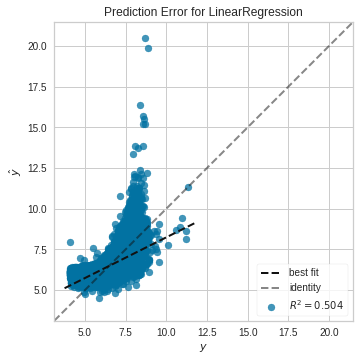

In [ ]:
#plot for prediction error for linear regression
visualizer = PredictionError(regressor)
visualizer.fit(X_lr_train, y_lr_train)  
visualizer.score(X_lr_test, y_lr_test)  
visualizer.poof()

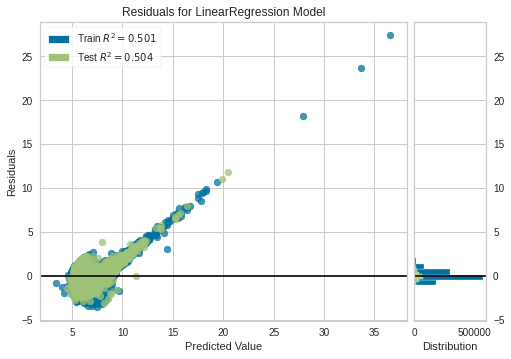

In [ ]:
#residual plot for linear regression
visualizer = ResidualsPlot(regressor)
visualizer.fit(X_lr_train, y_lr_train)  
visualizer.score(X_lr_test, y_lr_test)  
visualizer.poof()

#***RANDOM FOREST***

In [ ]:
#Importing the important libraries required to run the random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from matplotlib import pyplot

In [ ]:
rf_df = df.copy()

In [ ]:
#week number of the year
rf_df['pickup_week'] = rf_df.pickup_datetime.dt.week

#week day number starts with monday = 0
rf_df['pickup_day'] = rf_df.pickup_datetime.dt.weekday

#minute of the hour
rf_df['minute'] = rf_df.pickup_datetime.dt.minute

#minute of the day
rf_df['pickup_minute'] = rf_df['pickup_hour'] * 60 + rf_df['minute']

rf_df.drop(columns=['minute'],inplace=True)

In [ ]:
#get rid of the columns that we don't need
rf_df.drop(columns=['id','pickup_datetime', 'dropoff_datetime','speed','dropff_day','dropff_hour'],inplace=True)

In [ ]:
#dummify the required variables 
rf_df = pd.get_dummies(rf_df,columns =['vendor_id','store_and_fwd_flag'],
                        prefix=["vendor","flag"])

In [ ]:
rf_df.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'month', 'pickup_day', 'pickup_hour', 'pickup_week', 'pickup_minute',
       'vendor_1', 'vendor_2', 'flag_N', 'flag_Y'],
      dtype='object')

In [ ]:
#list of features to be used for training and testing 

features_rf = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance',
       'month', 'pickup_day', 'pickup_hour', 'pickup_week', 'pickup_minute',
       'vendor_1', 'vendor_2', 'flag_N', 'flag_Y']

In [ ]:
rf_df['trip_duration'] = np.log(rf_df['trip_duration'].values)


In [ ]:
X_rf = np.array(rf_df[features_rf])

In [ ]:
y_rf = np.array(rf_df['trip_duration'])

In [ ]:
#train test split of the model in 80:20 ratio

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split( X_rf,y_rf , test_size = 0.20, random_state = 123) 
print(X_rf_train.shape)
print(X_rf_test.shape)

(1151795, 15)
(287949, 15)


In [ ]:
# Import the model we are using

reg = RandomForestRegressor(max_depth=20,max_samples=0.8,n_estimators=80,n_jobs=-1)

reg.fit(X_rf_train, y_rf_train)



#OUTPUT FOR DEFAULT 
#RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                      max_depth=None, max_features='auto', max_leaf_nodes=None,
#                      max_samples=None, min_impurity_decrease=0.0,
#                      min_impurity_split=None, min_samples_leaf=1,
#                      min_samples_split=2, min_weight_fraction_leaf=0.0,
#                      n_estimators=100, n_jobs=None, oob_score=False,
#                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=20, max_samples=0.8, n_estimators=80, n_jobs=-1)

##Going with the hyperparameter tuned model with maximum tree depth of 20. 80 percent of the original dataset was given to any individual tree by using the max_samples and number of estimators was 80.

In [ ]:
#predicting on the test split
y_rf_pred = reg.predict(X_rf_test)

In [ ]:
#root mean squared error 
rmse_rf = np.round(np.sqrt(metrics.mean_squared_error((y_rf_test),(y_rf_pred))),2)
print(f'Root mean squared error for our Random Forest model is:\n\n{rmse_rf}')



#OUTPUT FOR DEFAULT
#0.3121870956984125

Root mean squared error for our Random Forest model is:

0.32


In [ ]:
#mean squared error 
mse_rf = np.round(metrics.mean_squared_error(y_rf_test,y_rf_pred),2)
print(f'Mean squared error for Random Forest model is :\n\n{mse_rf}')

Mean squared error for Random Forest model is :

0.1


In [ ]:
#Mean absolute error 
mae_rf = np.round(mean_absolute_error(y_rf_test,y_rf_pred),2)
print(f'mean absolute error for Random Forest model is :\n\n{mae_rf}')

mean absolute error for Random Forest model is :

0.24


##**Root mean squared error for our random forest model is 0.31 which is better than linear regression model and good to start with.**

In [ ]:
#R2 score
print(f'R2 score for our Random Forest model is:\n\n{np.round(r2_score(y_rf_test,y_rf_pred),3)}')



#OUTPUT FOR DEFAULT
#0.8160485558146933

R2 score for our Random Forest model is:

0.808


##**That's quite an improvement from linear regression model. With the use of random forest algorithm, close to 81% of the variance in the dependent variable can be explained by the independent variables. Next, we will try to run the XGBoost model and see whether we can see any improvement in the metrics or not.**


In [ ]:
%%capture
pip install graphviz


In [ ]:
import graphviz
from sklearn.tree import export_graphviz

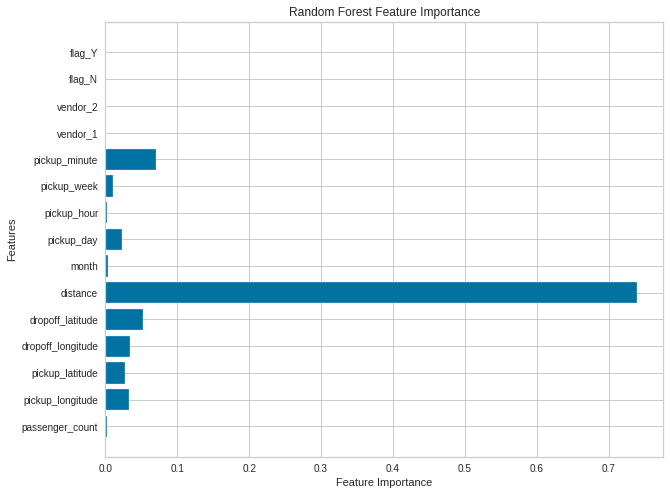

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(features_rf, reg.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
# get importance
importance = reg.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))



#OUTPUT FOR DEFAULT
#Feature: 0, Score: 0.00556
#Feature: 1, Score: 0.04369
#Feature: 2, Score: 0.03769
#Feature: 3, Score: 0.04432
#Feature: 4, Score: 0.05945
#Feature: 5, Score: 0.67941
#Feature: 6, Score: 0.00618
#Feature: 7, Score: 0.02417
#Feature: 8, Score: 0.00382
#Feature: 9, Score: 0.01763
#Feature: 10, Score: 0.07438
#Feature: 11, Score: 0.00172
#Feature: 12, Score: 0.00171
#Feature: 13, Score: 0.00013
#Feature: 14, Score: 0.00014

Feature: 0, Score: 0.00314
Feature: 1, Score: 0.03288
Feature: 2, Score: 0.02757
Feature: 3, Score: 0.03380
Feature: 4, Score: 0.05192
Feature: 5, Score: 0.73844
Feature: 6, Score: 0.00438
Feature: 7, Score: 0.02291
Feature: 8, Score: 0.00196
Feature: 9, Score: 0.01118
Feature: 10, Score: 0.06998
Feature: 11, Score: 0.00082
Feature: 12, Score: 0.00083
Feature: 13, Score: 0.00009
Feature: 14, Score: 0.00010


##**Distance with almost 70% contribution has been the feature most important at predicting the trip duration followed by pickup minute and rest of the features trailing behind with little importance. Flags and vendors have almost negligible contribution in predicting the trip duration.**

#***XGBOOST***

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from xgboost import plot_importance

In [ ]:
xgb_df = df.copy()

In [ ]:
xgb_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'speed', 'month', 'pickup_day',
       'pickup_hour', 'dropff_day', 'dropff_hour'],
      dtype='object')

In [ ]:
#week number of the year
xgb_df['pickup_week'] = xgb_df.pickup_datetime.dt.week

#week day number - starts with monday = 0
xgb_df['pickup_day'] = xgb_df.pickup_datetime.dt.weekday

#minute of the hour
xgb_df['minute'] = xgb_df.pickup_datetime.dt.minute

#minute of the day
xgb_df['pickup_minute'] = xgb_df['pickup_hour'] * 60 + xgb_df['minute']

xgb_df.drop(columns=['minute'],inplace=True)

In [ ]:
#get rid of the columns that we don't need
xgb_df.drop(columns=['id','pickup_datetime', 'dropoff_datetime','speed','dropff_day','dropff_hour'],inplace=True)

In [ ]:
#dummify the required variables 
xgb_df = pd.get_dummies(xgb_df,columns =['vendor_id','store_and_fwd_flag'],
                        prefix=["vendor","flag"])

In [ ]:
xgb_df.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'month', 'pickup_day', 'pickup_hour', 'pickup_week', 'pickup_minute',
       'vendor_1', 'vendor_2', 'flag_N', 'flag_Y'],
      dtype='object')

In [ ]:
#list of features to be used for training and testing 

features_xgb = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance',
       'month', 'pickup_day', 'pickup_hour', 'pickup_week', 'pickup_minute',
       'vendor_1', 'vendor_2', 'flag_N', 'flag_Y']

In [ ]:
xgb_df['trip_duration'] = np.log(xgb_df['trip_duration'].values)


In [ ]:
#features
X_xgb = np.array(xgb_df[features_xgb])

In [ ]:
#target
y_xgb = np.array(xgb_df['trip_duration'])

In [ ]:
#train test split of the model in 80:20 ratio

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split( X_xgb,y_xgb , test_size = 0.20, random_state = 123) 
print(X_xgb_train.shape)
print(X_xgb_test.shape)

(1151795, 15)
(287949, 15)


In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror',max_depth=25,subsample=0.8,eta=0.09)
model.fit(X_xgb_train, y_xgb_train)

XGBRegressor(eta=0.09, max_depth=25, objective='reg:squarederror',
             subsample=0.8)

##Running our Extreme gradient Boosting model with hyperparameters - maximum tree depth at 25, sub sampling i.e. the fraction of observations to be randomly samples for each tree keeping at 80% and eta value i.e. learning rate was kept at 0.09.

In [ ]:
#predicting on the test split
y_xgb_pred = model.predict(X_xgb_test)

In [ ]:
#root mean squared error 
rmse_xgb = np.round(np.sqrt(metrics.mean_squared_error((y_xgb_test),(y_xgb_pred))),2)
print(f'Root mean squared error for our XGBoost model is:\n\n{rmse_xgb}')



Root mean squared error for our XGBoost model is:

0.3


In [ ]:
# mean squared error 
mse_xgb = np.round(metrics.mean_squared_error(y_xgb_test,y_xgb_pred),2)
print(f'Mean squared error for XGBoost model is :\n\n{mse_xgb}')

Mean squared error for XGBoost model is :

0.09


In [ ]:
#Mean absolute error
mae_xgb = np.round(mean_absolute_error(y_xgb_test,y_xgb_pred),2)
print(f'Mean absolute error for XGBoost model is :\n\n{mae_xgb}')

Mean absolute error for XGBoost model is :

0.22


##**Root mean squared error for our XGBoost model is 0.29 which is a good rmse given our model.**

In [ ]:
#R2 score
print(f'R2 score for our XGBoost model is:\n\n{np.round(r2_score(y_xgb_test,y_xgb_pred),3)}')



R2 score for our XGBoost model is:

0.832


##**By using XGBoost model, almost 83% of the variance in the dependent variable can be explained by the independent variables which is an improvement compared to linear regression and random forest.**



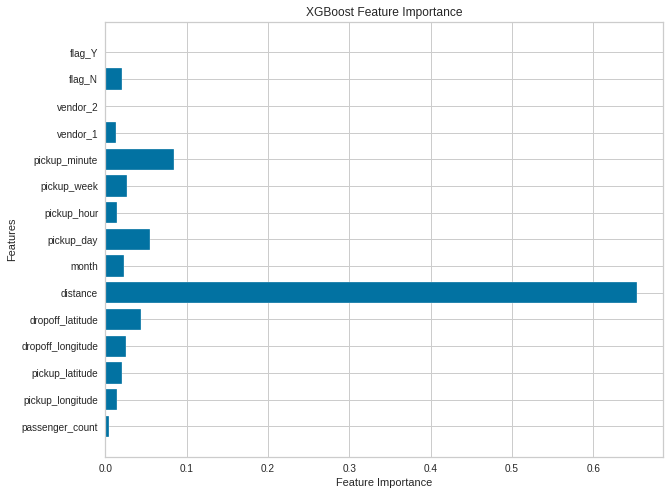

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(features_xgb, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

##**Distance with almost 67% contribution has been the feature most important at predicting the trip duration followed by pickup minute, pickup day, dropoff latitude and then by rest of the features trailing behind with smaller values. Flags and vendors have almost negligible contribution in predicting the trip duration.**

In [ ]:
track_df = pd.DataFrame({
    "Linear regression":{'RMSE value':rmse_lr,'MSE value':mse_lr,'MAE value':mae_lr, 'R2-score':np.round(r2_score(y_lr_test,y_lr_pred),3)},
    "Random forest":{'RMSE value':rmse_rf,'MSE value':mse_rf,'MAE value':mae_rf, 'R2-score':np.round(r2_score(y_rf_test,y_rf_pred),3)},
    "XGBoost":{'RMSE value':rmse_xgb,'MSE value':mse_xgb,'MAE value':mae_xgb, 'R2-score':np.round(r2_score(y_xgb_test,y_xgb_pred),3)}
}).T

In [ ]:
track_df

,RMSE value,MSE value,MAE value,R2-score
Linear regression,0.51,0.26,0.40,0.504
Random forest,0.32,0.10,0.24,0.808
XGBoost,0.30,0.09,0.22,0.832


#**Conclusion from our models**

##We tried to fit various models to predict the trip duration given the dataset. 
##Linear Regression, Random Forest, XGBoost. 
##Linear Regression did not perform that good for the very reason that it did not fit well to the pre-assumptions that are necessary to be validated in order to fit the linear regression algorithm and to give satisfactory results.
##Random Forest came out way better than linear regression model.
##XGBoost proved to be much more efficient in predicting the output and better RMSE and R2 Score value than linear regression and random forest model.
##There's always scope for improvement. In our models we could have also used Principal component analysis, some more hyperparameter tuning and various other methods but we will save that for later as still with small hyperparameter adjustments we are doing pretty good.
##We didn't run grid search CV for modelling purpose because the time consumption for it was very high and the performance metrics did not improve much either so we sticked to train test split only.
##It's  tradeoff between Computation time and best fit model for random forest and XGboost as latter turned out to be a bit computationally expensive when compared to former.

#**References**

1. [NYC Speed limit](https://www.newyorksafetycouncil.com/articles/speed-limits-in-new-york/)